In [22]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io, color
from PIL import Image 
import matplotlib.pylab as plt
import sys
import math

<ipython-input-33-3bad93d06e28>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pixels = np.array(pixels, dtype=np.float).reshape((img.shape[0], img.shape[1], 3))
<ipython-input-33-3bad93d06e28>:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fft_pixels = np.zeros(pixels.shape, dtype=np.complex)


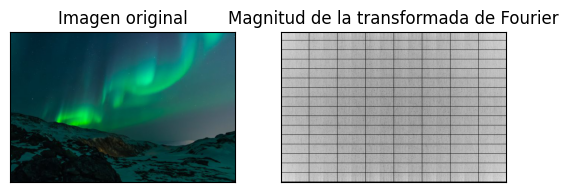

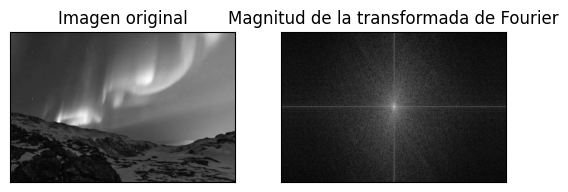

In [33]:
def fft_tarea3(signal):
    n = len(signal)
    if n == 1:
        return signal
    else:
        even = fft_tarea3(signal[::2])
        odd = fft_tarea3(signal[1::2])
        odd = np.pad(odd, (0, n//2 - len(odd)), 'constant')
        T = [math.e**(-2j*math.pi*k/n)*odd[k] for k in range(n//2)]
        even = np.pad(even, (0, max(0, n//2 - len(even))), 'constant')
        return np.array([even[k] + T[k] for k in range(n//2)] + [even[k] - T[k] for k in range(n//2)])

# Cargar la imagen y convertirla en una matriz de valores de píxeles
img = io.imread("https://www.w3schools.com/w3images/lights.jpg") 
pixels = np.array(img).flatten().tolist()
pixels = np.array(pixels, dtype=np.float).reshape((img.shape[0], img.shape[1], 3))
pixels = np.mean(pixels, axis=2)

# Aplicar la FFT a la matriz de valores de píxeles
fft_pixels = np.zeros(pixels.shape, dtype=np.complex)
for i in range(pixels.shape[0]):
    fft_pixels[i,:] = fft_tarea3(pixels[i,:])
for j in range(pixels.shape[1]):
    fft_pixels[:,j] = fft_tarea3(fft_pixels[:,j])

# Visualizar la imagen de la transformada de Fourier
fft_img = Image.fromarray(np.log(np.abs(fft_pixels)+1))

# Obtener la magnitud de la transformada
magnitud_fft = np.log(np.abs(fft_img) + 1)

# Crear una nueva matriz que contenga los valores de intensidad de los píxeles de la transformada de Fourier
fft_pixels_intensity = np.log(np.abs(fft_pixels)+1)

# Crear la imagen a partir de la nueva matriz
fft_img = Image.fromarray((fft_pixels_intensity*255/np.max(fft_pixels_intensity)).astype(np.uint8))

# Graficar la imagen original y la magnitud de la transformada de Fourier
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Imagen original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitud_fft, cmap="gray")
plt.title("Magnitud de la transformada de Fourier"), plt.xticks([]), plt.yticks([])
plt.show()

print('\n')
# mismo Ejercicio ,haciendo uso de OpenCV

# Cargar una imagen y convertirla a escala de grises
img = io.imread("https://www.w3schools.com/w3images/lights.jpg") 
gray_img = color.rgb2gray(img)
# Convertir la imagen a un arreglo de numpy
imagen_arreglo = np.array(gray_img)
# Aplicar la transformada de Fourier
imagen_fft = np.fft.fftshift(np.fft.fft2(imagen_arreglo))
# Obtener la magnitud de la transformada
magnitud_fft = np.log(np.abs(imagen_fft) + 1)
# Graficar la imagen original y la magnitud de la transformada de Fourier
plt.subplot(121), plt.imshow(imagen_arreglo, cmap="gray")
plt.title("Imagen original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitud_fft, cmap="gray")
plt.title("Magnitud de la transformada de Fourier"), plt.xticks([]), plt.yticks([])
plt.show()


**Ejercicio de Template Matching**

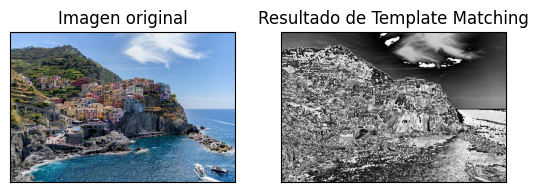

In [32]:
def templateMatching(image, kernel):
    # Obtener las dimensiones de la imagen y del kernel
    image_rows, image_cols = image.shape[:2]
    kernel_rows, kernel_cols = kernel.shape[:2]
    
    # Crear una matriz para el resultado de la convolución
    result = np.zeros_like(image)
    
    # Calcular la mitad del tamaño del kernel
    pad_height = int((kernel_rows - 1) / 2)
    pad_width = int((kernel_cols - 1) / 2)
    
    # Agregar un relleno a la imagen
    padded_image = cv.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REPLICATE)
    
    # Realizar la convolución
    for row in range(image_rows):
        for col in range(image_cols):
            # Calcular la región de la imagen que se va a multiplicar por el kernel
            region = padded_image[row:row + kernel_rows, col:col + kernel_cols]
            
            # Calcular la distancia euclidiana entre la región y el kernel
            distance = np.sqrt(np.sum((region - kernel) ** 2))
            
            # Asignar el valor resultante a la posición correspondiente en la matriz de resultados
            result[row, col] = distance
    
    return result
  
# Cargar la imagen
img = io.imread("https://www.w3schools.com/css/img_5terre.jpg") 

# Convertir la imagen a una matriz NumPy
img_array = np.array(img)

# Convertir la imagen a escala de grises
gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

# Definir una plantilla de 3x3 con valores de -1 en las esquinas y 1 en el centro
template = np.array([[-1,-1,-1],
                     [-1, 8,-1],
                     [-1,-1,-1]])

# Realizar la convolución de la imagen con la plantilla usando el método de distancia euclidiana
result = templateMatching(gray, template)

# Mostrar la imagen original y imagen resultante
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Imagen original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, cmap="gray")
plt.title("Resultado de Template Matching"), plt.xticks([]), plt.yticks([])
plt.show()